# Assignment 8 : Data Analytics - II

Problem Statement
1.	Implement	logistic	regression	using	Python /R to perform classification on Social_Network_Ads.csv dataset.
2.	ComputeConfusionmatrixtofindTP,FP,TN,FN,Accuracy, Errorrate, Precision,Recall on the given dataset.


# Theory before Assignment


### **Logistic Regression:**

**Logistic Regression** is a statistical model used for binary classification problems, i.e., when the target variable (dependent variable) has two possible outcomes (such as 0 or 1, Yes or No, True or False). Despite having "regression" in the name, logistic regression is primarily used for classification tasks.

#### **How It Works:**
- The model uses a logistic function (sigmoid function) to model the relationship between the independent variables (features) and the probability of the target variable being one of the two classes.
  
  **Sigmoid Function**: 
  The logistic (sigmoid) function is defined as:

  σ(z)= 1/1+e^-z 

  Where:
  - **z** is the linear combination of input features (i.e., \( z = w_1 x_1 + w_2 x_2 + ... + w_n x_n + b \)), where \( w_1, w_2, ..., w_n \) are weights, and \( x_1, x_2, ..., x_n \) are the features.

- The output of the sigmoid function is between 0 and 1, representing the probability that a given input belongs to a specific class (e.g., class 1). For classification, a threshold (usually 0.5) is applied to decide the predicted class:
  - If \( P(y = 1|X) > 0.5 \), predict **1** (positive class).
  - Otherwise, predict **0** (negative class).

#### **Objective**:
The goal of logistic regression is to find the weights (coefficients) that best fit the data by minimizing the **log-loss** (cross-entropy loss) function, which measures the difference between the true and predicted probabilities.

### **Confusion Matrix & Evaluation Metrics:**

In classification tasks, particularly with binary classification, the **confusion matrix** is a useful tool to evaluate the performance of the model. It provides insight into the **True Positives (TP)**, **False Positives (FP)**, **True Negatives (TN)**, and **False Negatives (FN)**, which help in calculating various performance metrics.

#### **Confusion Matrix:**

|               | Predicted Positive (1) | Predicted Negative (0) |
|---------------|------------------------|------------------------|
| **Actual Positive (1)** | True Positive (TP) | False Negative (FN) |
| **Actual Negative (0)** | False Positive (FP) | True Negative (TN) |

### **Explanation of Terms:**
- **True Positive (TP)**: The number of positive instances correctly classified as positive.
- **False Positive (FP)**: The number of negative instances incorrectly classified as positive (Type I error).
- **True Negative (TN)**: The number of negative instances correctly classified as negative.
- **False Negative (FN)**: The number of positive instances incorrectly classified as negative (Type II error).

#### **Performance Metrics:**
Using the values from the confusion matrix, we can calculate various evaluation metrics for the classifier.

1. **Accuracy**:
   - Accuracy is the proportion of correctly classified instances (both positives and negatives) to the total number of instances.
   - **Interpretation**: Accuracy tells us the overall success rate of the classifier.

2. **Error Rate**:
   - The error rate is the proportion of incorrect predictions (both FP and FN) to the total number of predictions.
   - **Interpretation**: The error rate tells us the rate at which the model makes incorrect predictions.

3. **Precision**:
   - Precision is the proportion of true positive predictions out of all the positive predictions made (i.e., how many of the predicted positive instances were actually positive).
   - **Interpretation**: Precision answers the question: "When the model predicts positive, how often is it correct?"

4. **Recall (Sensitivity or True Positive Rate)**:
   - Recall is the proportion of actual positive instances that were correctly identified by the model (i.e., how many of the actual positives were captured by the model).
   - **Interpretation**: Recall answers the question: "How many of the actual positives did the model find?"

5. **F1 Score**:
   - The F1 score is the harmonic mean of Precision and Recall. It is a balance between Precision and Recall, especially useful when dealing with imbalanced datasets.
   - **Interpretation**: The F1 score provides a balance between Precision and Recall. It is often used when there is a need to balance the importance of false positives and false negatives.

### **Summary of Metrics:**

| Metric          | Formula                                  | Interpretation                                      |
|-----------------|------------------------------------------|----------------------------------------------------|
| **Accuracy**    | {TP + TN}/{TP + TN + FP + FN}  | Overall correct predictions as a percentage.       |
| **Error Rate**  | {FP + FN}/{TP + TN + FP + FN}  | Proportion of incorrect predictions.               |
| **Precision**   | {TP}/{TP + FP}                 | Correct positive predictions out of all predicted positives. |
| **Recall**      | {TP}/{TP + FN}                 | Correct positive predictions out of all actual positives. |
| **F1 Score**    | {2 * Precision * Recall}/{Precision + Recall} | Balanced measure of Precision and Recall.          |

# Assignment 8 : Data Analytics II

In [1]:
import pandas as pd

In [2]:
pd.options.display.float_format = '{:.2f}'.format

In [3]:
df = pd.read_csv('social_network_ads.csv')

In [4]:
df.shape

(400, 5)

In [5]:
df.ndim

2

In [6]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
df.drop(columns=["User ID"]).describe()

,Age,EstimatedSalary,Purchased
count,400.00,400.00,400.00
mean,37.66,69742.50,0.36
std,10.48,34096.96,0.48
min,18.00,15000.00,0.00
25%,29.75,43000.00,0.00
50%,37.00,70000.00,0.00
75%,46.00,88000.00,1.00
max,60.00,150000.00,1.00


In [9]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [10]:
df = df.rename(columns={
    "User ID": "userID",
    "Gender": "gender",
    "Age": "age",
    "EstimatedSalary":"estimated_salary",
    "Purchased":"purchased"
})

In [11]:
df.columns

Index(['userID', 'gender', 'age', 'estimated_salary', 'purchased'], dtype='object')

In [12]:
df.isna().sum()

userID              0
gender              0
age                 0
estimated_salary    0
purchased           0
dtype: int64

In [13]:
numeric_df = df.drop(columns=["userID"]).select_dtypes(include=["number"])
numeric_df.columns

Index(['age', 'estimated_salary', 'purchased'], dtype='object')

In [14]:
numeric_df.mean()

age                   37.66
estimated_salary   69742.50
purchased              0.36
dtype: float64

In [15]:
numeric_df.median()

age                   37.00
estimated_salary   70000.00
purchased              0.00
dtype: float64

In [16]:
numeric_df.mode()

,age,estimated_salary,purchased
0,35,72000,0


In [17]:
print(f"Range:\n{numeric_df.max() - numeric_df.min()}")

Range:
age                     42
estimated_salary    135000
purchased                1
dtype: int64


In [18]:
numeric_df.std()

age                   10.48
estimated_salary   34096.96
purchased              0.48
dtype: float64

In [19]:
numeric_df.var()

age                       109.89
estimated_salary   1162602700.50
purchased                   0.23
dtype: float64

In [20]:
def mean_abs_deviation(df:pd.DataFrame, col):
    return (df[col] - df[col].mean()).abs().mean()

In [21]:
for col in numeric_df.columns:
    print(f"{col} : {mean_abs_deviation(df,col)}")

age : 8.50775
estimated_salary : 27318.7875
purchased : 0.4593875


In [22]:
bins = pd.cut(df['age'], bins=6, include_lowest=True)
df['age_group'] = bins
df.groupby('age_group').agg({
    "estimated_salary":['mean','median','max','min','std']
}).sort_values(by=("estimated_salary","mean"),ascending=False)

/var/folders/h9/2r0zc3w16s18w78zcbd__xkc0000gn/T/ipykernel_96655/2226774517.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_group').agg({


estimated_salary                                 
                                       mean   median     max    min      std
age_group                                                                   
(53.0, 60.0]                       77428.57 76000.00  144000  23000 38487.80
(46.0, 53.0]                       73500.00 68500.00  150000  20000 43380.35
(32.0, 39.0]                       71971.96 70000.00  149000  20000 31025.08
(39.0, 46.0]                       70605.63 71000.00  149000  22000 29743.42
(25.0, 32.0]                       68817.07 73000.00  150000  15000 35305.06
(17.956999999999997, 25.0]         55387.76 58000.00   90000  16000 25609.91

# Data Visualization

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Data

<Axes: xlabel='gender', ylabel='Count'>

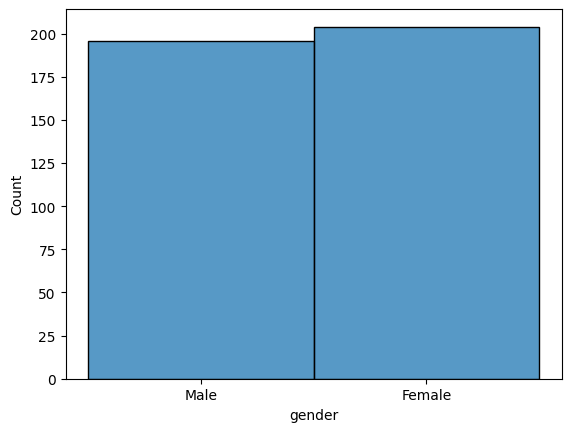

In [24]:
sns.histplot(df, x="gender")

<Axes: xlabel='age', ylabel='Density'>

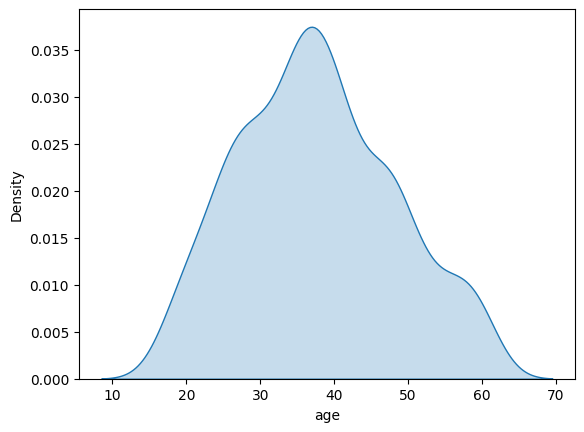

In [25]:
sns.kdeplot(df, x='age', fill=True)

<Axes: xlabel='estimated_salary', ylabel='Count'>

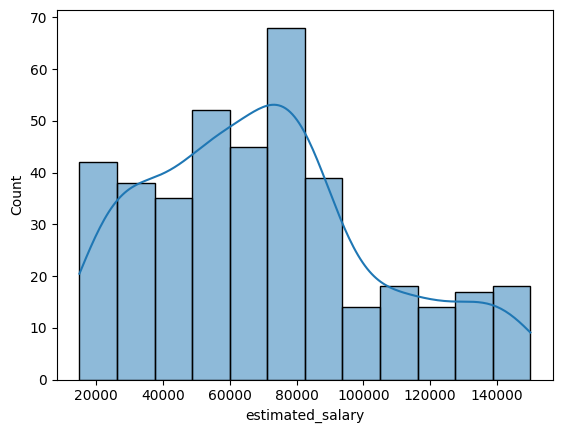

In [26]:
sns.histplot(df, x="estimated_salary", kde=True, fill=True)

## Categorical Data

<Axes: xlabel='purchased', ylabel='count'>

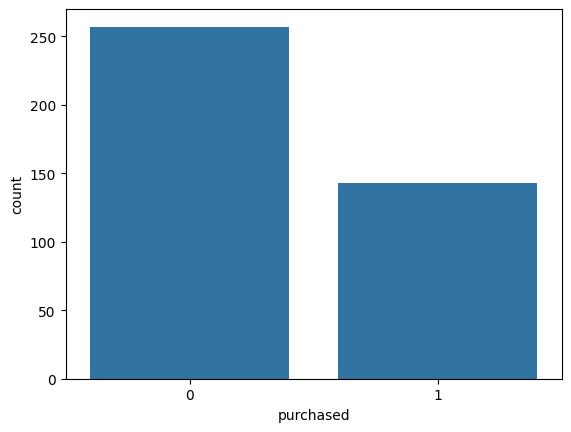

In [27]:
sns.countplot(df, x="purchased")

<Axes: xlabel='purchased', ylabel='age'>

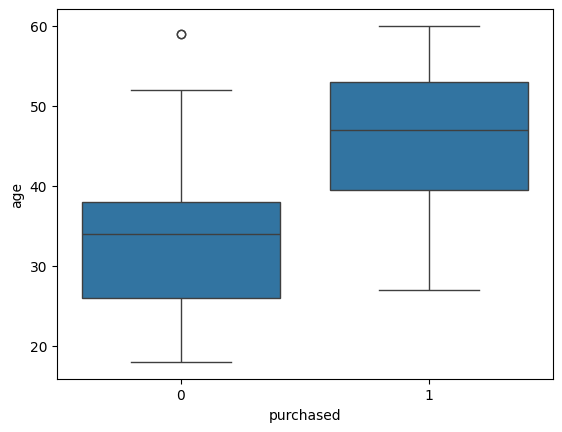

In [28]:
sns.boxplot(df, x="purchased", y="age")

<Axes: xlabel='purchased', ylabel='estimated_salary'>

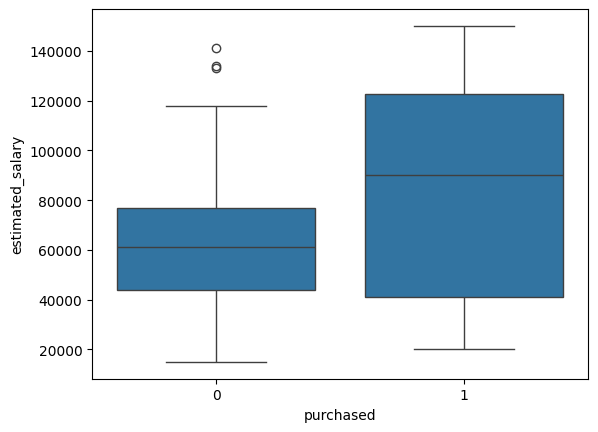

In [29]:
sns.boxplot(df, x="purchased", y="estimated_salary")

<Axes: xlabel='age', ylabel='Count'>

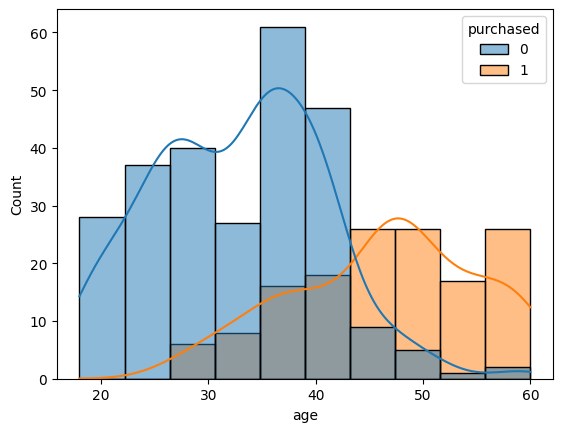

In [30]:
sns.histplot(df, x="age", hue="purchased", kde=True)

<Axes: xlabel='gender', ylabel='Count'>

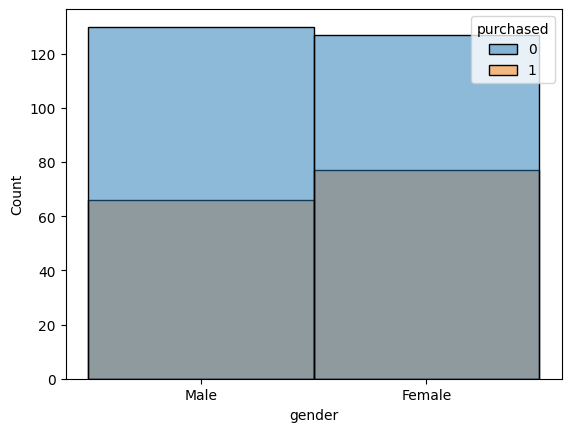

In [31]:
sns.histplot(df, x="gender", hue="purchased")

<Axes: xlabel='estimated_salary', ylabel='Density'>

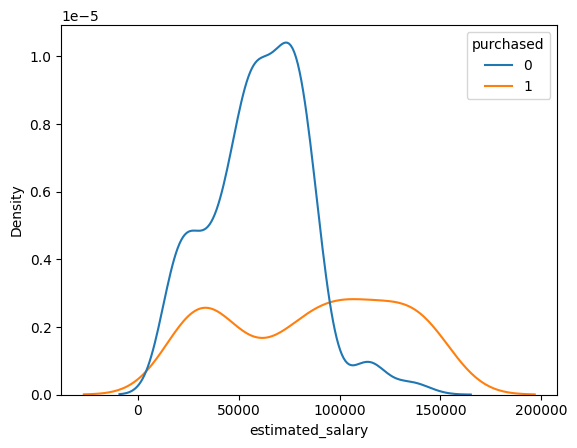

In [32]:
sns.kdeplot(df, x="estimated_salary", hue="purchased", fill=False)

In [33]:
correlation_matrix = df.drop(columns=['userID']).corr(numeric_only=True)
correlation_matrix["purchased"]

age                0.62
estimated_salary   0.36
purchased          1.00
Name: purchased, dtype: float64

<Axes: >

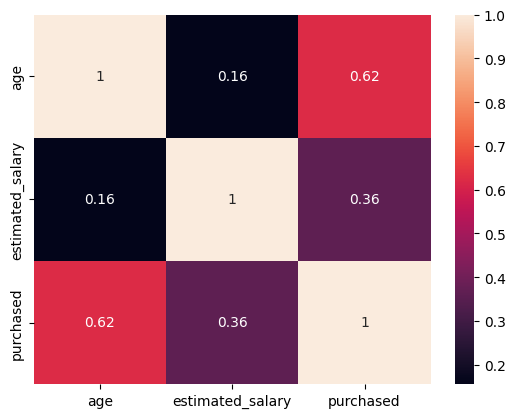

In [34]:
sns.heatmap(correlation_matrix, annot=True)

# Data Analytics

> **IMPORTANT NOTE** Logistic regression, in its basic form, does not handle text-based categorical variables (like "male" and "female") directly. Logistic regression requires numeric inputs, so you need to convert categorical variables (such as gender) into numerical representations before using them in a model.

In [35]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [36]:
le = LabelEncoder()
df["gender"] = le.fit_transform(df["gender"])
df["gender"].unique()

array([1, 0])

In [47]:
X = df.select_dtypes(include=["number"]).drop(columns=["purchased"]).values
y = df["purchased"].values

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [41]:
y_pred = model.predict(X_test)

# Model Evaluation

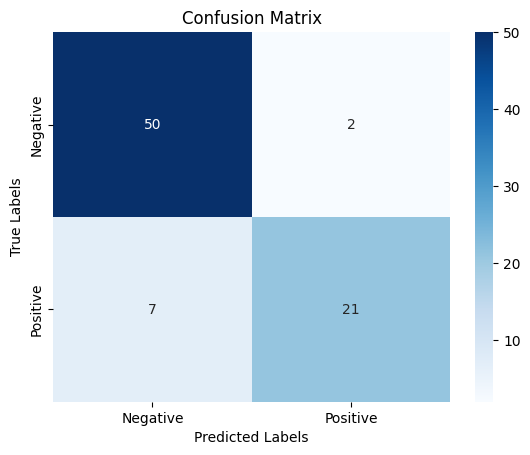

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
sns.heatmap(cm, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'],cmap='Blues',fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [43]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.8875

In [44]:
recall_score(y_true=y_test, y_pred=y_pred)

0.75

In [45]:
f1_score(y_true=y_test, y_pred=y_pred)

0.8235294117647058

In [46]:
precision_score(y_true=y_test, y_pred=y_pred)

0.9130434782608695